# Data Visualization (with Matplotlib and Seaborn)

The primary tool in the Python ecosystem for plotting data and creating figures is **Matplotlib**. This is a very powerful library that gives you access and control of every little thing in creating a figure. This can be good and bad and presents a somewhat steep learning curve - you often have to write many lines of code to produce a simple graphic. A more recent entrant into the PyData community is **Seaborn** (https://stanford.edu/~mwaskom/software/seaborn/examples/index.html). Seaborn is essentially a wrapper around Matplotlib and aims to provide simple access to common types of data visualizations. Also, the Matplotlib default aesthetics are a bit plain, and another thing Seaborn provides is really pretty graphics right out of the box. We're going to learn to use both of these, be sure to pay close attention to when we're using each. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.io import output_notebook, show

# This makes sure viz are included in the notebooks.
%matplotlib inline

/home/anna/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# here we set some aesthetic parameters so that all of our figures are nice and big
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
sns.set(style="white", context="talk")

In [3]:
# Fetch some movie data to work with
cols = ['star_rating','title','content_rating','genre','duration','actors_list']
filepath = '../data/imdb_1000.csv'
movies = pd.read_csv(filepath, header=0, names=cols, na_filter=False)

# drunks
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
drinks = pd.read_csv("../data/drinks.csv", header=0, names=drink_cols, na_filter=False)

In [4]:
movies.head(1)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."


## Histograms
A histogram presents a bar plot to visualize the relative counts of occurence of each possible category. With discrete/categorical variables, we simply count things up and create a bar plot. With continuous variables, you end up creating implicit "categories" by binning up the continuous values into discrete chunks and then counting.

In [5]:
movies.star_rating.head(10)

0    9.3
1    9.2
2    9.1
3    9.0
4    8.9
5    8.9
6    8.9
7    8.9
8    8.9
9    8.9
Name: star_rating, dtype: float64

We can get some plotting functionality for free from Pandas - Data Frames have built-in methods for calling Matplotlib. 

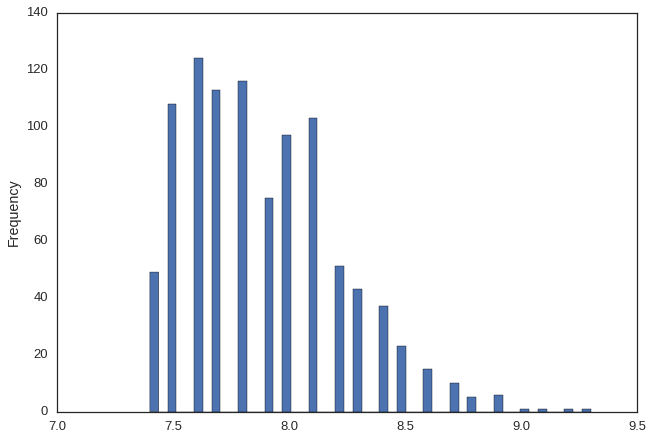

In [6]:
# PANDAS and matplotlib
# drinks.beer.plot(kind="hist",bins=15)
movies.star_rating.describe()
movies.star_rating.plot(kind="hist", bins=50)

The histogram visualizes the *distribution* of the values in the **beer** variable. Most are less than 25, but there are some data points all the way out past 350.

Notice that this Matplotlib functionality is built into Data Frames - so it doesn't *appear* that we're calling any external functions. But just to be clear, here's how you would accomplish the same thing more directly using functions from Matplotlib.

(array([  49.,    0.,  108.,    0.,    0.,  124.,    0.,  113.,    0.,
           0.,  116.,    0.,    0.,   75.,    0.,   97.,    0.,    0.,
         103.,    0.,    0.,   51.,    0.,   43.,    0.,    0.,   37.,
           0.,   23.,    0.,    0.,   15.,    0.,    0.,   10.,    0.,
           5.,    0.,    0.,    6.,    0.,    0.,    1.,    0.,    1.,
           0.,    0.,    1.,    0.,    1.]),
 array([ 7.4  ,  7.438,  7.476,  7.514,  7.552,  7.59 ,  7.628,  7.666,
         7.704,  7.742,  7.78 ,  7.818,  7.856,  7.894,  7.932,  7.97 ,
         8.008,  8.046,  8.084,  8.122,  8.16 ,  8.198,  8.236,  8.274,
         8.312,  8.35 ,  8.388,  8.426,  8.464,  8.502,  8.54 ,  8.578,
         8.616,  8.654,  8.692,  8.73 ,  8.768,  8.806,  8.844,  8.882,
         8.92 ,  8.958,  8.996,  9.034,  9.072,  9.11 ,  9.148,  9.186,
         9.224,  9.262,  9.3  ]),
 <a list of 50 Patch objects>)

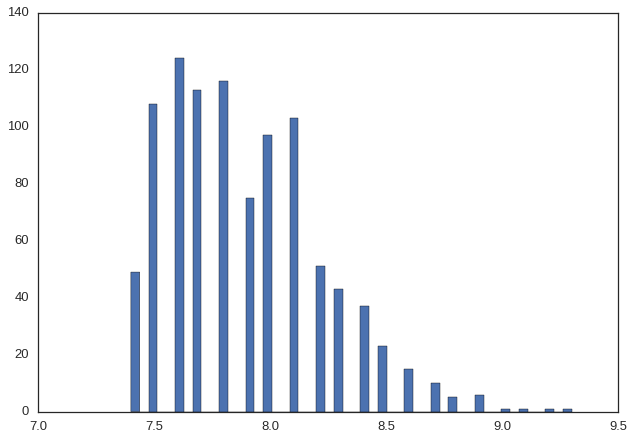

In [7]:
# Calling Matplotlib directly
# plt.hist(drinks.beer,15)
plt.hist(movies.star_rating, 50)

We can also do this with Seaborn just as easily.

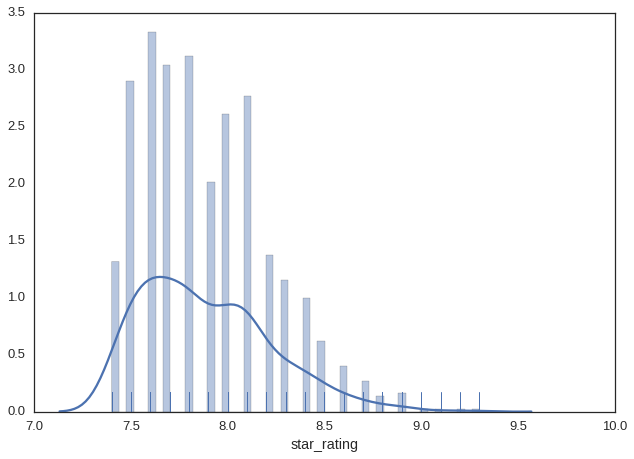

In [8]:
# Seaborn (rug plot is individual data points), kde (kernel distributon estimation)
# sns.distplot(drinks.beer,  rug=True)
sns.distplot(movies.star_rating, rug=True, bins=50)
# Question: 49 instances of 7.4, but there is only one tick here.  Not sure I understand this.
# Also I don't understand the y-axis, this is not count, right ?
# movies.columns

Seaborn throws in a *rugplot* and a *kernel density estimate* on top of the histogram. These can all be added or removed with the right arguments.

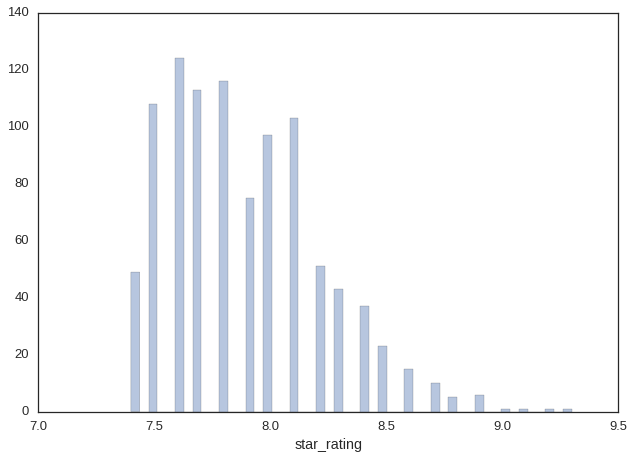

In [9]:
#sns.distplot(drinks.beer, rug=False, kde=False)
sns.distplot(movies.star_rating, rug=False, kde=False, bins=50)

In [10]:
# pd.scatter_matrix(drinks[['beer', 'spirit', 'liters']])
movies.head(3)
#movies['act'] = movies['actors_list'].map(lambda x: len(x.split(',')))
#movies.head(3)
#movies.content_rating.value_counts()
#movies['content_num'] = movies['content_rating'].map(lambda x: x[0:1])
#movies.head(10)
#Question:  Is there a better way to do this ??  How can I do this as inline?
def f(x):
    if x == "G" or x == "GP":
        return float(10.0)
    elif x == "PG":
        return float(20.0)
    elif x == "PG-13" or x == "APPROVED" or x == "PASSED":
        return float(30.0)
    elif x == "NOT RATED" or x == "" or x == "UNRATED":
        return float(40.0)
    elif x == "R":
        return float(50.0)
    elif x == "NC-17" or x == "TV-MA":
        return float(60.0)
    elif x == "X":
        return float(70.0)
# Question:  How to tell when I have NaN's in a cell?  How to check for that
movies['cont'] = movies["content_rating"].map(f)
movies.head(1)


,star_rating,title,content_rating,genre,duration,actors_list,cont
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",50


In [11]:
l = [row for i, row in movies.iterrows()]
movies.head(2)
l[17].cont

40.0

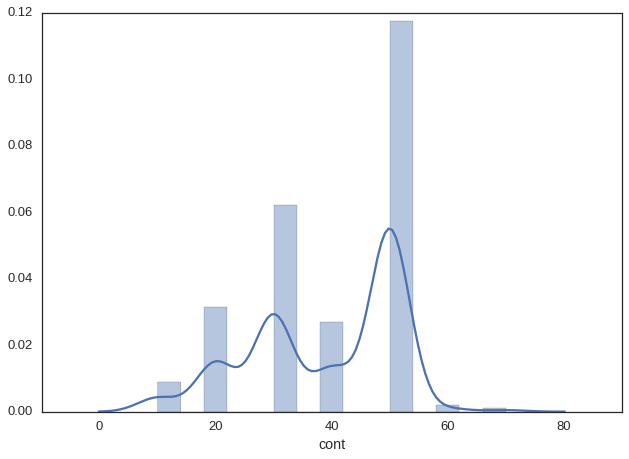

In [12]:
#sns.distplot(movies.duration)
sns.distplot(movies.cont)

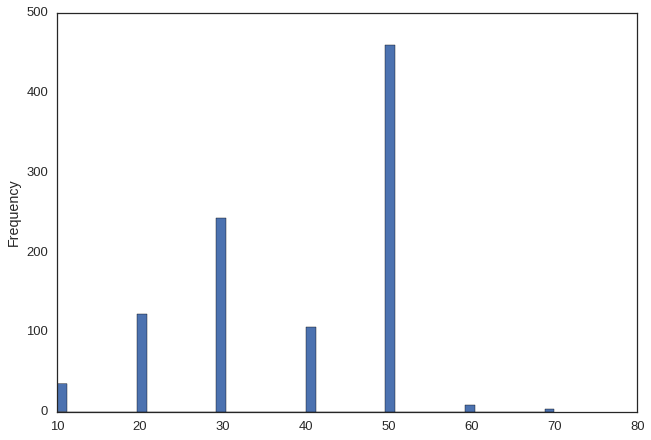

In [13]:
movies.cont.plot(kind="hist", bins=50)

## Scatterplot
We often want to visualize a *bivariate* distribution - how are two variables related to one another? 

In [14]:
#drinks[["beer","wine"]].head()
movies.columns
movies.head(2)

,star_rating,title,content_rating,genre,duration,actors_list,cont
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",50
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",50


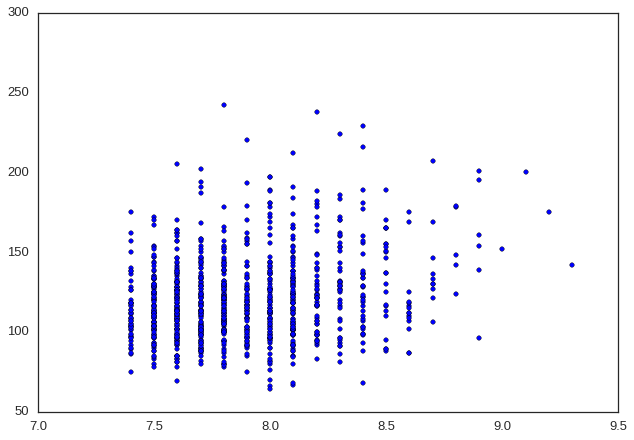

In [15]:
#plt.scatter(x=drinks.beer, y= drinks.wine)
plt.scatter(x=movies.star_rating, y=movies.duration)
# Question:  Scatterplot might not be the right plot for this?

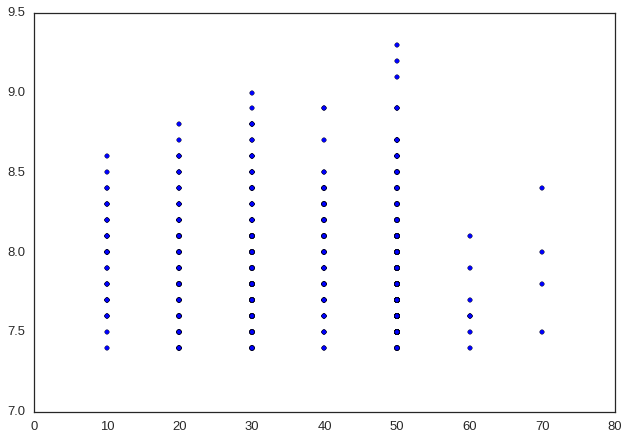

In [16]:
plt.scatter(x=movies.cont, y=movies.star_rating)

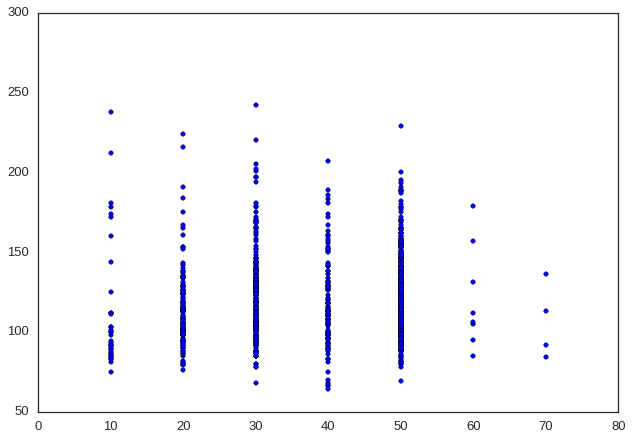

In [17]:
plt.scatter(x=movies.cont, y=movies.duration)

/home/anna/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


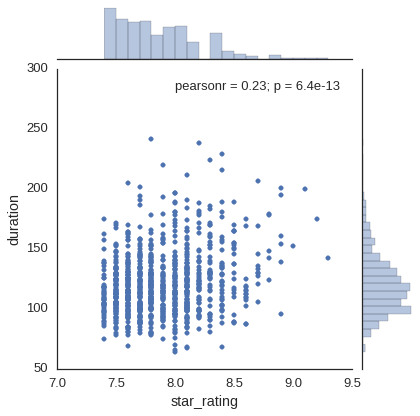

In [18]:
#sns.jointplot("beer","wine",data=drinks)
sns.jointplot("star_rating", "duration", data=movies)

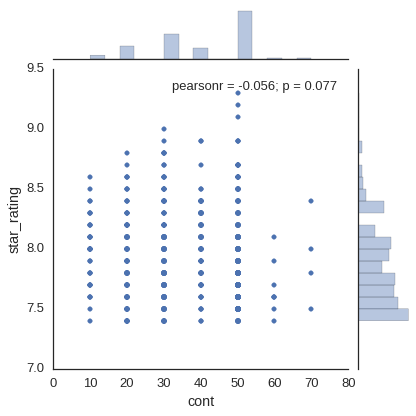

In [19]:
sns.jointplot("cont", "star_rating", data=movies)

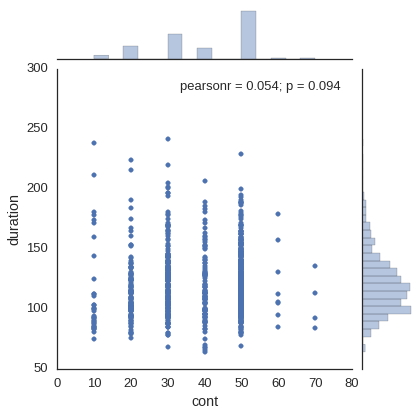

In [20]:
movies.duration.describe()
sns.jointplot("cont","duration", data=movies )

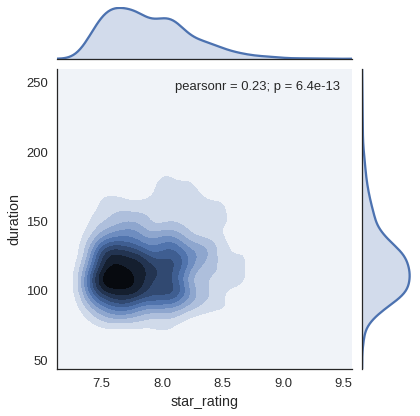

In [21]:
sns.jointplot("star_rating","duration", data=movies, kind= "kde")

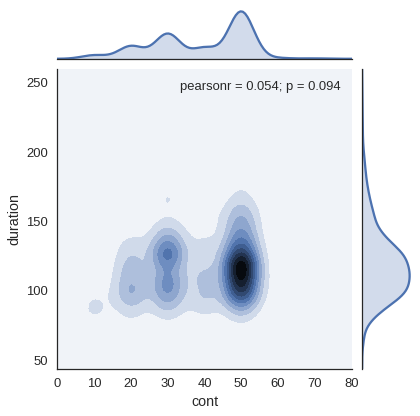

In [22]:
sns.jointplot("cont","duration", data=movies, kind= "kde")

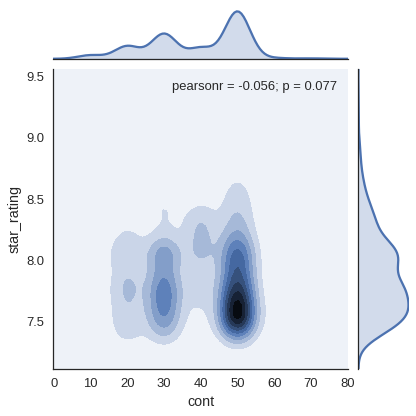

In [23]:
sns.jointplot("cont","star_rating", data=movies, kind= "kde")

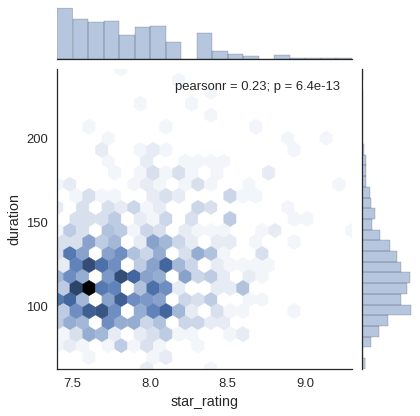

In [24]:
# Question: How is this used?
#sns.jointplot("beer","wine", data=drinks[(drinks.beer < 100) & (drinks.wine < 30)] , kind = "hex")
sns.jointplot("star_rating","duration", data=movies, kind= "hex")

Make sure you label your axes. 

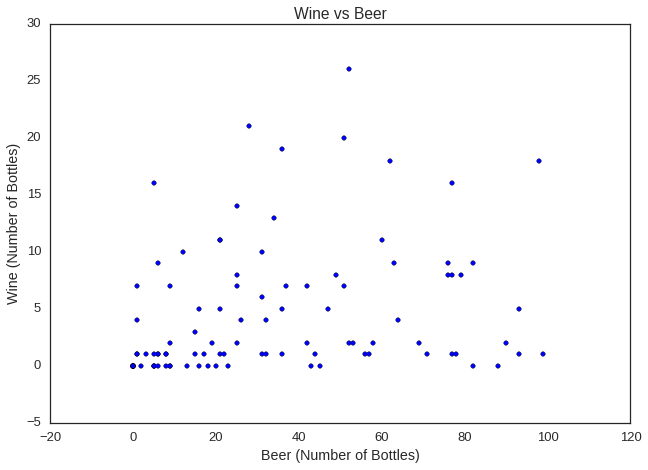

In [25]:
plt.scatter("beer","wine", data=drinks[(drinks.beer < 100) & (drinks.wine < 30)] )
plt.ylabel("Wine (Number of Bottles)")
plt.xlabel("Beer (Number of Bottles)")
plt.title("Wine vs Beer")

## Scatterplot Matrix
Let's look at every bivariate visualization at once

In [26]:
#sns.pairplot(movies[["star_rating","duration","cont"]])
drinks.beer.describe()
drinks.head(1)
#movies.cont.describe()
#movies.duration.describe()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0,AS


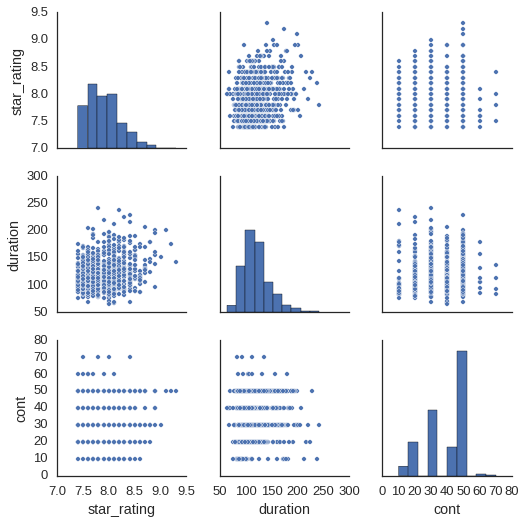

In [27]:
sns.pairplot(movies[["star_rating","duration","cont"]])
# sns.pairplot(movies[["star_rating","duration"]])

# I'm not sure why when I put in "cont" as the third parameter it doesn't display?  
# Ans:  Because I had NaN in some of the values
# Question: it is a categorical attribute vs continuous? 
# Ans:  Can do this for either categ. or continuous, but I'm not sure if that
# has any value here...?

In [28]:
# Question:  Why don't the max's match up with the pair-wise graphs below?
# Why isn't the mean of wine higher?  Seems right at 0 rather than 50
# Why doesn't the diagonal show that x and y are equal?  Since they are the same values.
drinks.describe()

,beer,spirit,wine,liters
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


/home/anna/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


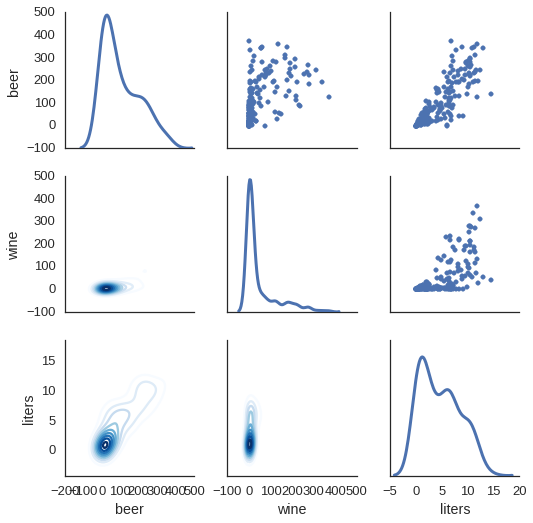

In [29]:
# Question: what is diag_sharey
myGraphic = sns.PairGrid(drinks[["beer","wine","liters"]], diag_sharey=False)
myGraphic.map_lower(sns.kdeplot, cmap="Blues")
myGraphic.map_upper(plt.scatter)
myGraphic.map_diag(sns.kdeplot, lw=3)

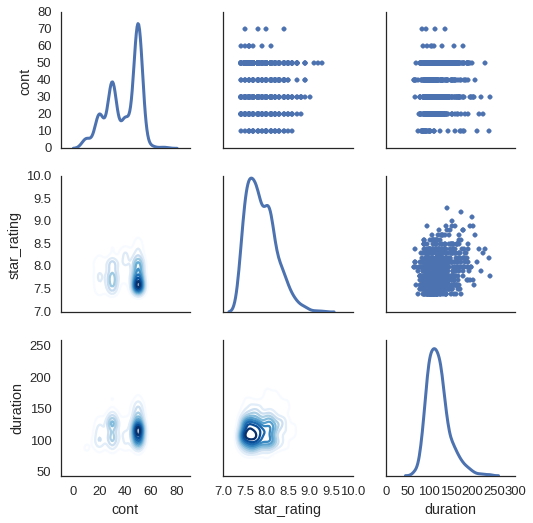

In [30]:
myGraphic = sns.PairGrid(movies[["cont","star_rating","duration"]], diag_sharey=False)
myGraphic.map_lower(sns.kdeplot, cmap="Blues")
myGraphic.map_upper(plt.scatter)
myGraphic.map_diag(sns.kdeplot, lw=3)
# Question: KDE plots and the corresponding scatterplots?

## Barplot
Visualize counts across discrete variables

In [31]:
drinks.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

This Pandas "Series" has a nice plot method

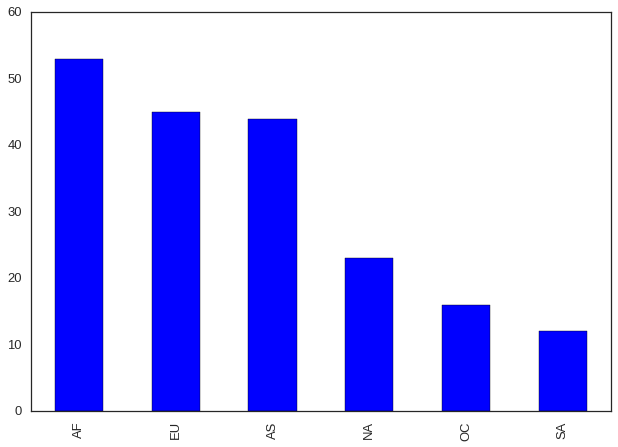

In [32]:
drinks.continent.value_counts().plot(kind="bar")

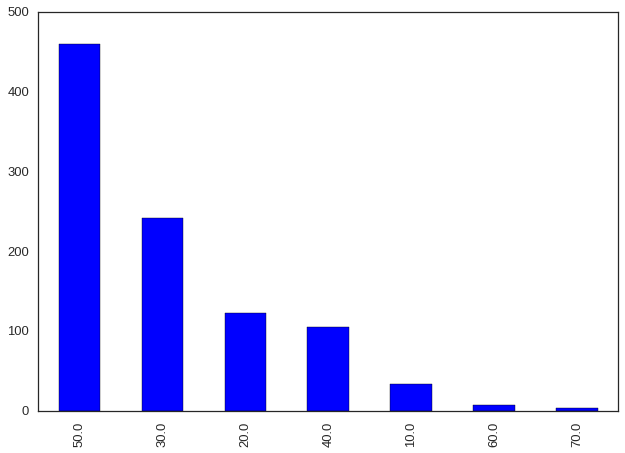

In [33]:
# Question: Same as histogram, right ?
movies.cont.value_counts().plot(kind='bar')

In [34]:
movies.groupby('cont').mean()

,star_rating,duration
cont,,
10,7.985714,114.342857
20,7.879675,115.300813
30,7.876543,123.967078
40,8.066981,118.311321
50,7.854783,122.163043
60,7.675000,121.250000
70,7.925000,106.250000


In [35]:
# calculate the mean alcohol amounts for each continent
drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


Pandas groupBy() has some useful behavior with plots 

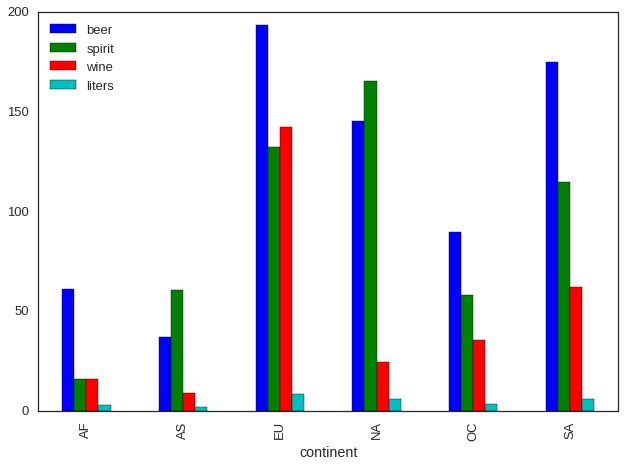

In [36]:
# side-by-side bar plots
drinks.groupby('continent').mean().plot(kind='bar')
# Question:  Can you groupby ranges ? Or do I need to add in another column based on range

In [37]:
# Question:  Can you groupby ranges ? Or do I need to add in another column based on range
# How do I increase the x=axis?movies.groupby('cont').mean().plot(kind='bar')

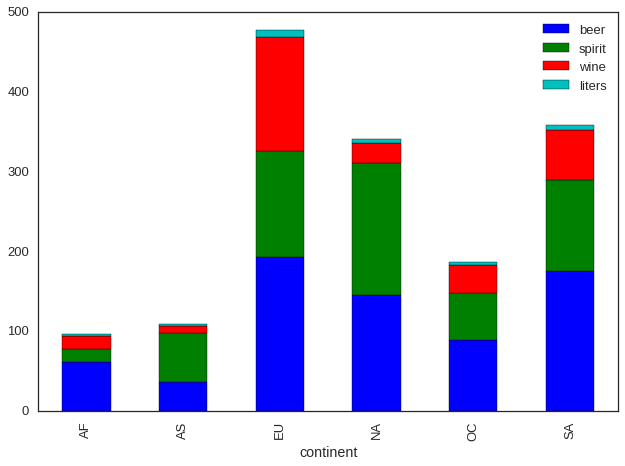

In [38]:
drinks.groupby('continent').mean().plot(kind='bar',stacked=True)

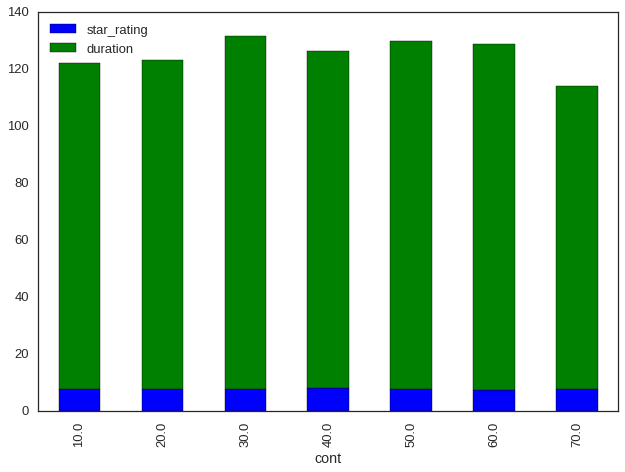

In [39]:
movies.groupby('cont').mean().plot(kind='bar',stacked=True)

## BoxPlot
Another useful way of visualizing the distribution of a variable. A box plot shows the quantiles of a distribution.

In [40]:
drinks.beer.describe()

count    193.000000
mean     106.160622
std      101.143103
min        0.000000
25%       20.000000
50%       76.000000
75%      188.000000
max      376.000000
Name: beer, dtype: float64

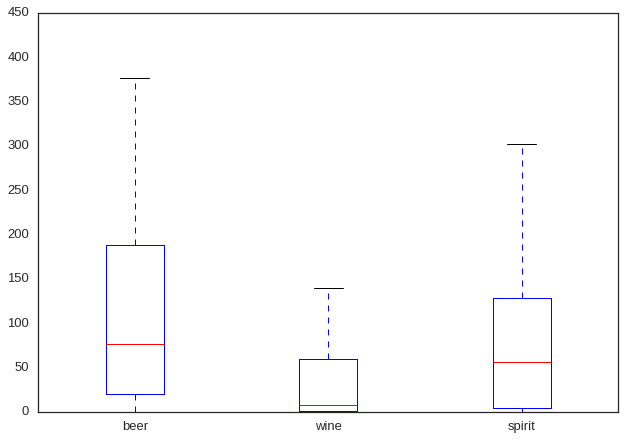

In [41]:
drinks[["beer","wine","spirit"]].plot(kind="box")

In [42]:
movies.describe()

,star_rating,duration,cont
count,979.000000,979.000000,979.000000
mean,7.889785,120.979571,38.917263
std,0.336069,26.218010,12.656073
min,7.400000,64.000000,10.000000
25%,7.600000,102.000000,30.000000
50%,7.800000,117.000000,40.000000
75%,8.100000,134.000000,50.000000
max,9.300000,242.000000,70.000000


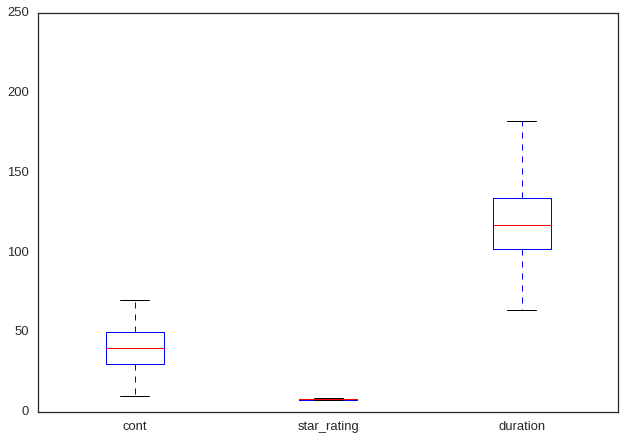

In [43]:
# Question: Is it important to get these values on the same scale ?

movies[["cont","star_rating","duration"]].plot(kind="box")

/home/anna/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:1613: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


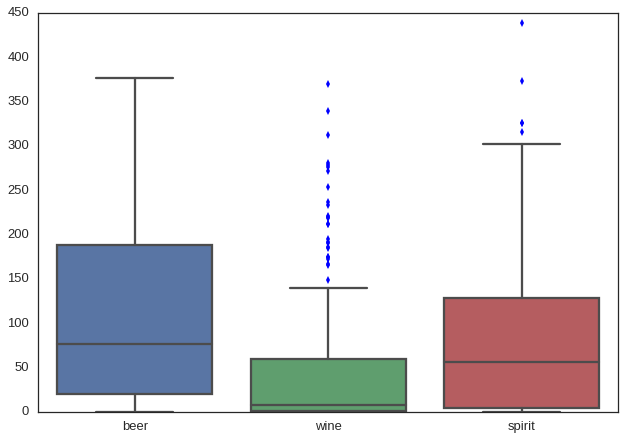

In [44]:
sns.boxplot(drinks[["beer","wine","spirit"]])

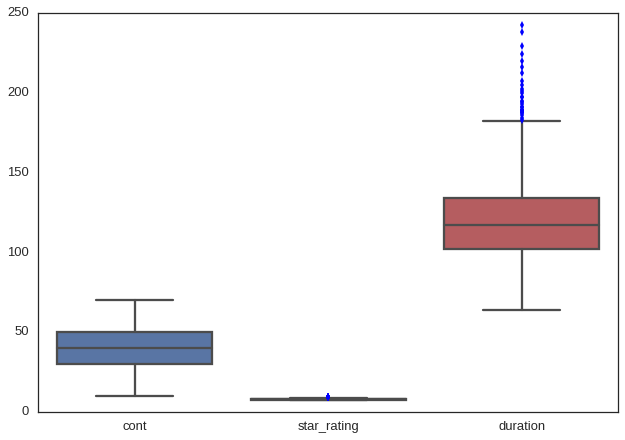

In [45]:
sns.boxplot(movies[["cont","star_rating","duration"]])

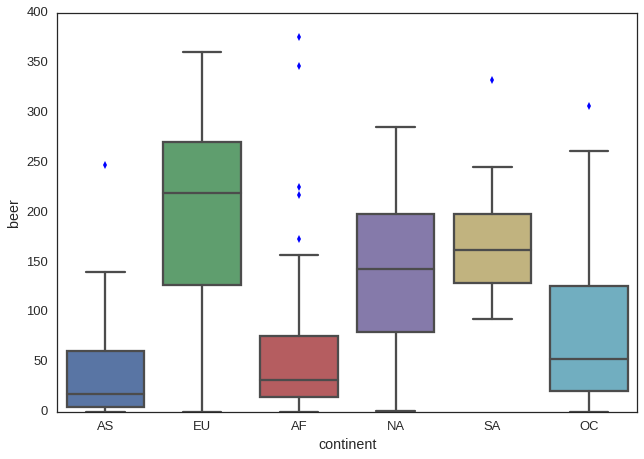

In [46]:
sns.boxplot(x="continent",y="beer",data=drinks)

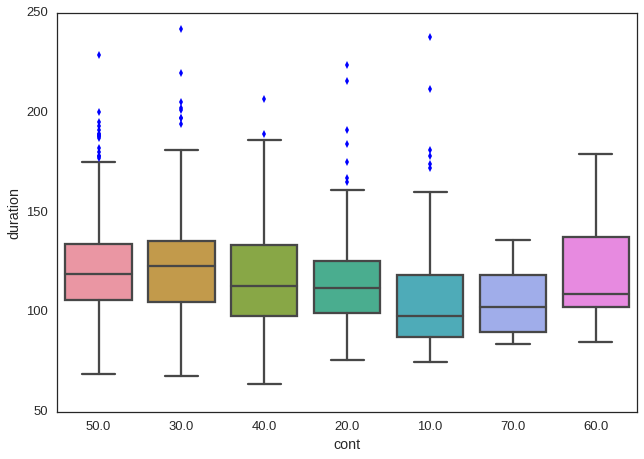

In [47]:
# It seems that this is a "group by" box plot
sns.boxplot(x="cont",y="duration",data=movies)

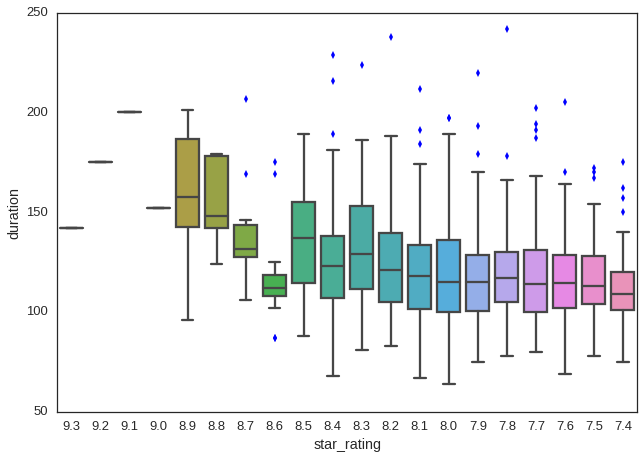

In [48]:
sns.boxplot(x="star_rating",y="duration",data=movies)

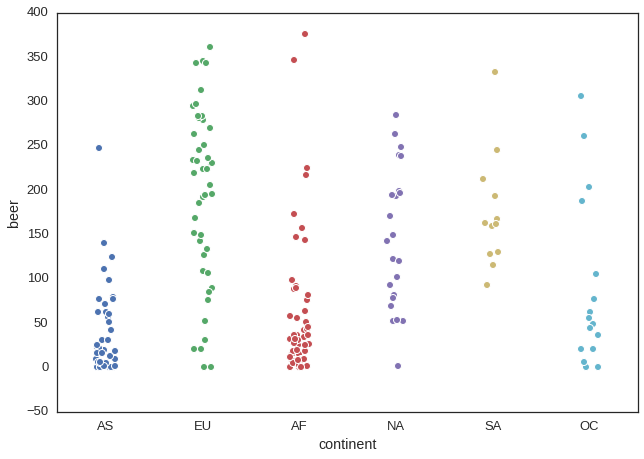

In [49]:
sns.stripplot(x="continent",y="beer",data=drinks,jitter=True)

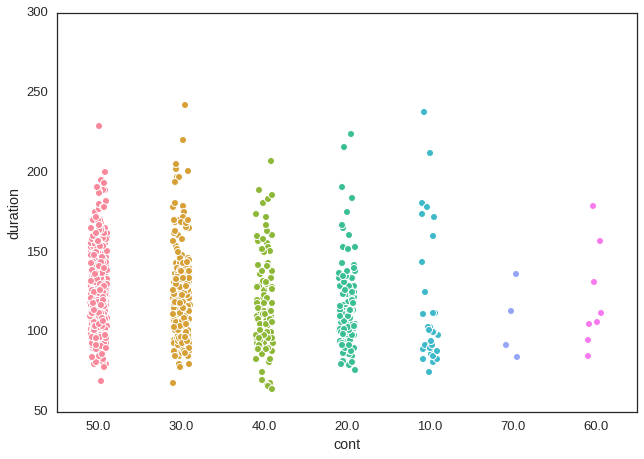

In [50]:
# Question:  This is a case where it's good to have categorical (or groups)
sns.stripplot(x="cont",y="duration",data=movies,jitter=True)

In [51]:
# Question: this totally does not make sense to do...! X-axis needs to be group (or discrete) 
# and Y-axis can be continous or discrete.
sns.stripplot(x="date",y="ct",data=bikes,jitter=True)

NameError: name 'bikes' is not defined

## LinePlot
Visualize some variable relative to a fixed ordering. For example, plotting a time series - the value of some variable at each time point.

In [71]:
# Load in the UFO data set
url = '../data/ufo.csv'
ufo = pd.read_csv(url)
ufo['Time'] = pd.to_datetime(ufo.Time) # How does it understand how to convert format?
ufo['Year'] = ufo.Time.dt.year

# counts occurences per year
ufo.Year.value_counts().sort_index().head(5)

1930    2
1931    2
1933    1
1934    1
1935    1
Name: Year, dtype: int64

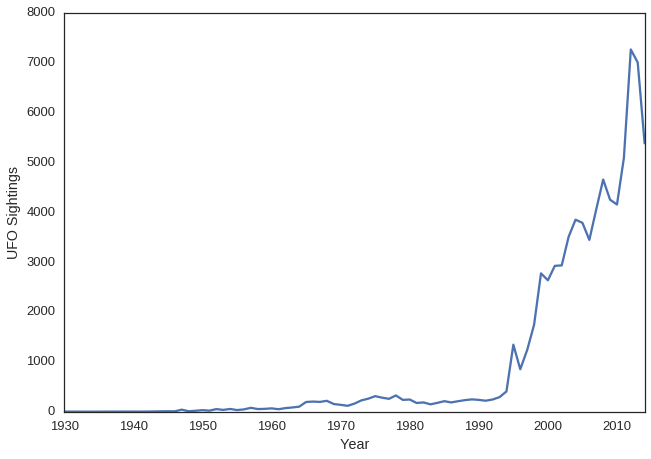

In [72]:
ufo.Year.value_counts().sort_index().plot()
plt.ylabel("UFO Sightings")
plt.xlabel("Year")

In [ ]:
movies.groupby('cont').mean()

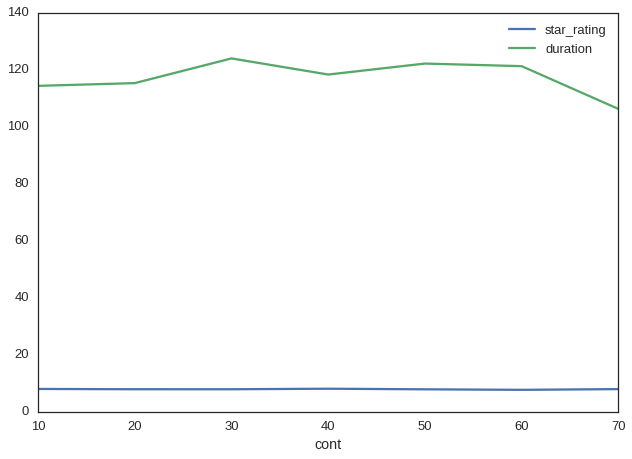

In [69]:
movies.groupby("cont").mean().plot()

In [65]:
import requests
from time import sleep

def getYearFromOMDB(t):
    r = requests.get('http://www.omdbapi.com/?t=' + t + '&r=json&type=movie')
    if r.status_code == 200:
        print r.json()["Year"]
        sleep(3)
        return int(r.json()["Year"])
    else:
        print r.status_code, r.text
        return 0

In [ ]:
movies.columns

In [66]:
#l = [ getYearFromOMDB(title) for title in movies["title"] ]
from time import sleep
titles = movies["title"]
years = []
for title in titles[0:47]:
    r = getYearFromOMDB(title)
    if r == 0:
        exit(0)
    else:
        years.append(r)

1994
1972
1974
2008
1994
1957
1966
2003
1993
1999
2001
2010
1980
1994
2002
2014
1975
1954
1990
1977
1999
2002
1946
1995
1995
1997
1968
1991
1994
1931
2001
2011
1942
2014
1998
1936
1998
1981
1954
1960
1999
1950
2002
2012
2000
1991
2000


KeyError: 'Year'

In [68]:
len(years)

47

## Grids
Often helpful to look at many variables simultaneously while separating the data into different segments (like a visual groupby).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d21f234d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4d21e07a10>]], dtype=object)

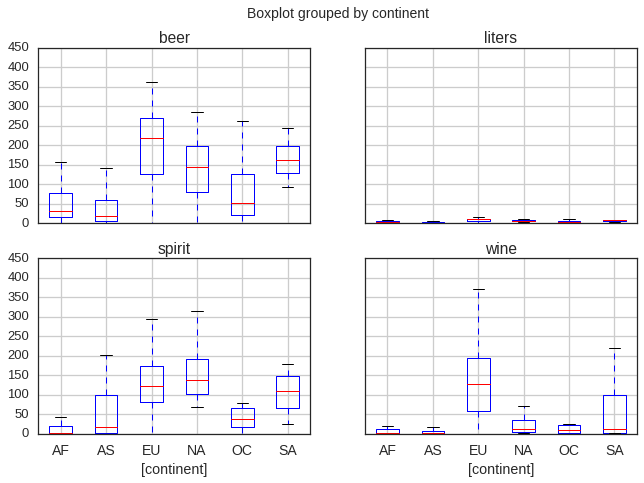

In [74]:
drinks.boxplot(by='continent')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d22017e90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f4d217929d0>], dtype=object)

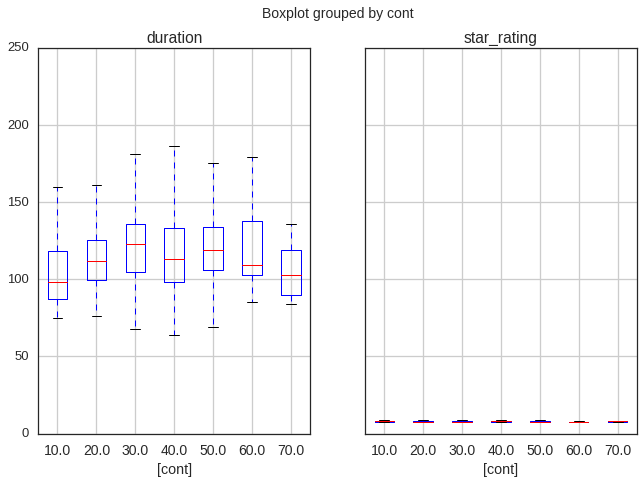

In [75]:
movies.boxplot(by='cont')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d21230890>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4d1bf6b650>]], dtype=object)

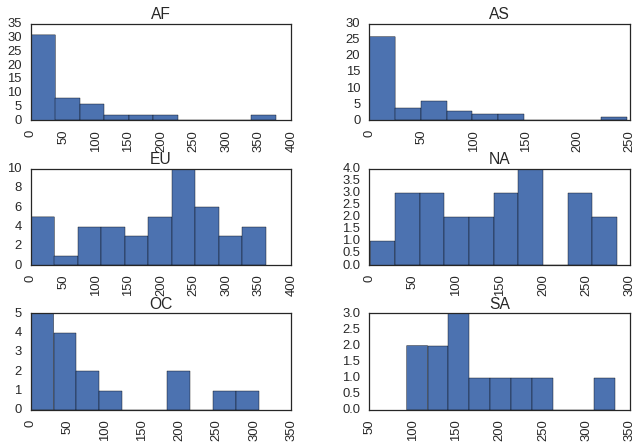

In [78]:
# histogram of beer servings grouped by continent
drinks.hist(column='beer', by='continent')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d2098e690>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4d1b7f4f90>]], dtype=object)

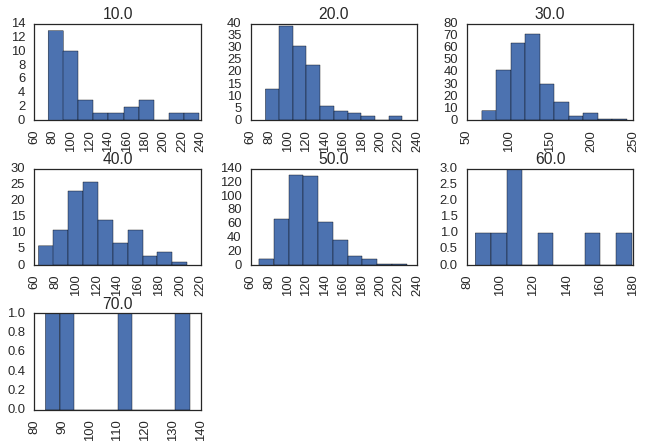

In [79]:
movies.hist(column='duration', by='cont')

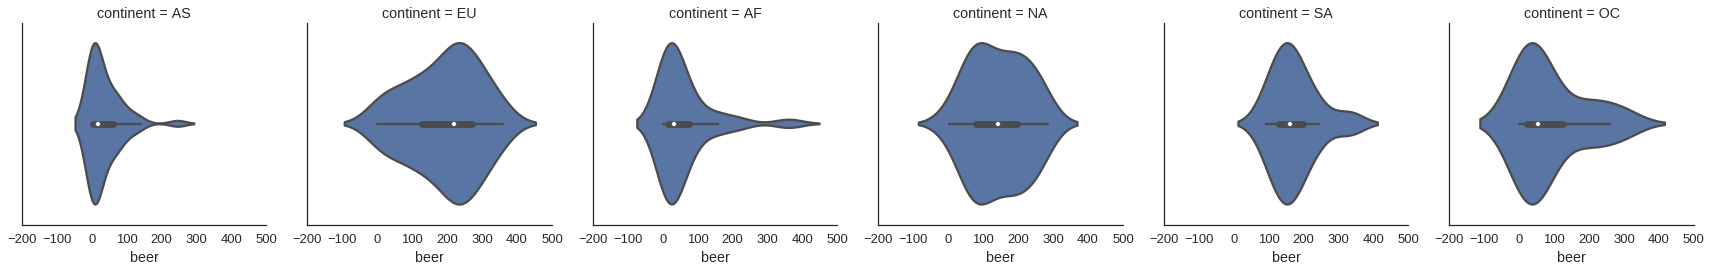

In [80]:
# Question: Not sure I understand purpose of violin plots
sns.factorplot(x="beer",col="continent",data=drinks,kind="violin")


Many complicated grids are possible (https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.factorplot.html)

## Saving

In [ ]:
sns.factorplot(x="beer",col="continent",data=drinks,kind="violin")
plt.savefig('../../../../beer_histogram.png')

### Bokeh
The newest kid on the block is Bokeh (http://bokeh.pydata.org/), a python library that is a wrapper for some HTML/javascript plotting tools. This way, we can use simple Python commands to utilize the power of web technologies to have immersive, interactive data visualizations.